# Estructura de la sesión:
- Introducción. Entorno de trabajo
- Entrenando un árbol de decisión (clasificación)
  - Holdout
  - Validación cruzada
  - Modificación de hiperparámetros
  - Variables categóricas
- Árboles de regresión


# Introducción. Entono de trabajo
Opción 1
   - GitHub + Google Colab (nube de Google)
    https://colab.research.google.com/

Opción 2
   - GitHub + tu editor favorito (DataSpell de JetBrains, Visual Studio, ...)

Opción 3
   - GitHub + Jupyter Notebook (local)
   - Instalación:
        - **pip install notebook**
   - Ejecución
        - **jupyter notebook**

  

---










## Usando Python.
- Python básico (python sin librerías extra): listas, diccionarios, conjuntos, ...
- numpy: vectores y matrices con números
- pandas: Data frames

Esto es una lista (base Python)

In [1]:
a = [1, 2, 3]
print(a)

[1, 2, 3]


Esto es un vector y una matriz con numpy. Sólo pueden contener números

In [2]:
import numpy as np

print('This is a vector:')

a = np.array([1, 2, 3])
print(a)

print()

print('Ths is a matrix:')
b = np.array([[1,2,3],
              [4,5,6]])
print(b)

This is a vector:
[1 2 3]

Ths is a matrix:
[[1 2 3]
 [4 5 6]]


Estos son pandas data frames. Contienen diferentes columnas, algunas de ellas son números, pero otras contienen valores categóricos

In [3]:
import pandas as pd
pd.DataFrame({'a':[1,2,3], 'b':['a', 'b', 'c']})

,a,b
0,1,a
1,2,b
2,3,c


Parece que pandas dataframes son una estructura de datos apropiada para representar datos. Sin embargo, scikit-learn sólo puede utilizar matrices numpy. Por lo tanto, los valores categóricos deben ser codificados como números. El flujo de trabajo típico cuando se trabaja con scikit-learn es:
1. Cargar los datos como Pandas dataframe
2. Llevar a cabo un análisis exploratorio de los datos para comprenderlos. Se conoce como  EDA (Exploratory Data Analysis)
3. Codificar los Pandas dataframe como matrices numpy (procesar los valores categóricos y los valores inexistentes - missing values)
4. Diseñar los modelos de aprendizaje automático con la librería scikit-learn

## Scikit-learn (sklearn):
- Colección de algoritmos y herramientas de aprendizaje automático en Python.
- [http://scikit-learn.org/stable/](SCIKIT-LEARN)

** Otros paquetes de aprendizaje automático en Python: **
- Pylearn2
- PyBrain
- ...

---





## Datos de entrada para sklearn (matrices numéricas)

- Los conjuntos de datos para sklearn son matrices numpy **numéricas**:
- Esto implica que los atributos/características categóricas deben ser representadas como:
    - Enteros
    - One-hot-encoding / variables dummy

- Sin embargo, hay una tendencia para integrar Pandas dataframes con scikit learn
- Los valores inexistentes se representan como np.nan


- Un ejemplo sencillo de conjunto de datos es el conjunto de datos del iris, que se incluye dentro del propio sklearn.
- De lo contrario, tendríamos que cargarlo desde un archivo

In [4]:
import numpy as np
from sklearn.datasets import load_iris
iris_meta = load_iris()

In [5]:
print(iris_meta.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
print(iris_meta.target_names)

['setosa' 'versicolor' 'virginica']


Aquí tenemos las variables/características/atributos de entrada y la variable objetivo/salida

In [7]:
X = iris_meta.data
y = iris_meta.target

- X (la característica de entrada) es un numpy array de 2 dimensiones
- y (variable objetivo) es un numpy vector

In [8]:
print(type(X))
print(X.shape) # 150 instancias and 4 características de entrada
print(X.dtype) # Lo valores son números reales (float)

<class 'numpy.ndarray'>
(150, 4)
float64


In [9]:
print(type(y))
print(y.shape) # 150 valores de la variable objetivo
print(y.dtype) # Los valores son enteros

<class 'numpy.ndarray'>
(150,)
int32


Podemos visualizar las 10 primeras estancias

In [10]:
print(X[0:10,0:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [11]:
print(y[:])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


A continuación, visualizamos toda la tabla, siendo la variable de respuesta la última columna. No es necesario hacer esto cuando se trabaja con sklearn, es sólo para visualizarlo

In [12]:
np.concatenate((X,y[:,np.newaxis]), axis=1)[0:10]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ]])

---
Podemos dibujar el conjunto de datos del dataset iris para ver cómo se distribuye.

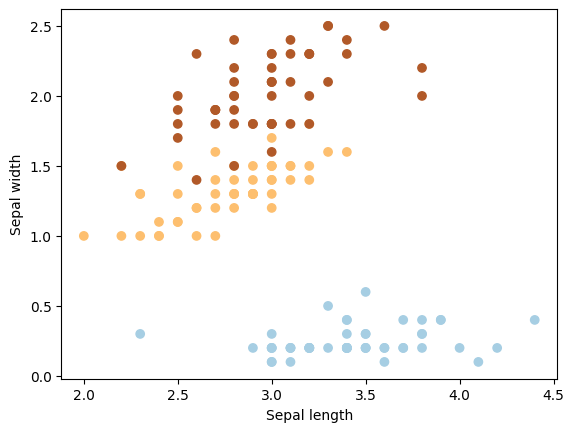

In [13]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 1], X[:, 3], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Podemos ver como se integran los pandas con matplotlib

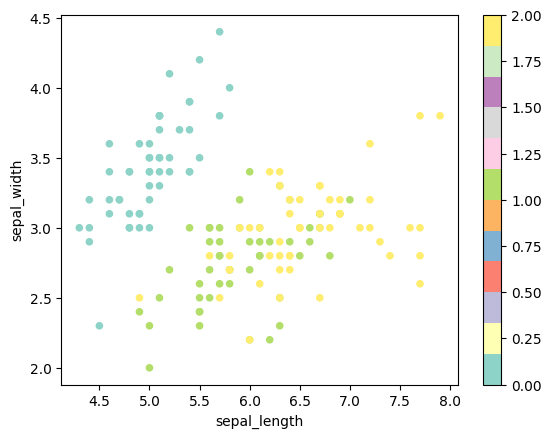

In [14]:
import pandas as pd

df_X = pd.DataFrame(X)

df_X.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
df_X["Iris"] = y

df_X.plot.scatter(x="sepal_length", y="sepal_width", c=y, cmap=plt.cm.Set3)
plt.show()


Dibujar un histograma de una de las variables

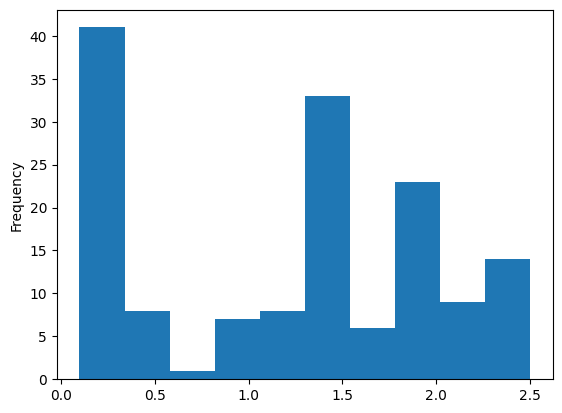

In [15]:

df_X.petal_width.plot.hist()
# Probar mas configuraciones
#df_X.petal_width.plot.hist(bins=50, xlim=(0,3))
plt.show()

# Otras opciones
# df_X["petal_width"].hist()

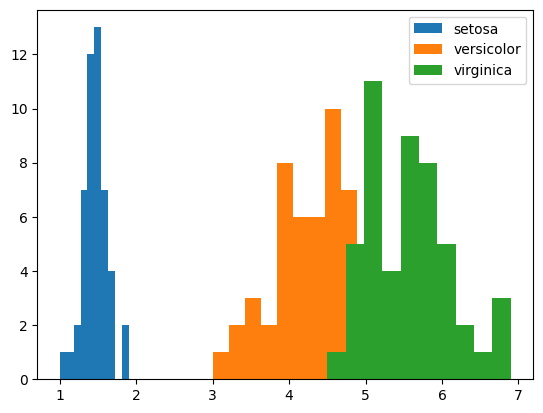

In [16]:
plt.hist(X[0:49,2], label='setosa')
plt.hist(X[50:99,2], label='versicolor')
plt.hist(X[100:149,2], label='virginica')
plt.legend(loc='upper right')
plt.show()

## Ejercicio
Mediante el histograma, podemos ver la distribucción de las variables de entrada teniendo en cuenta la clase. ¿Cuál es la mejor variable de entrada que nos permite separar las distintas clases?

Hay una librería de visualización (**seaborn**) que posee un conjunto de funciones estadísticas gráficas. Trabaja sobre **matplotlib**

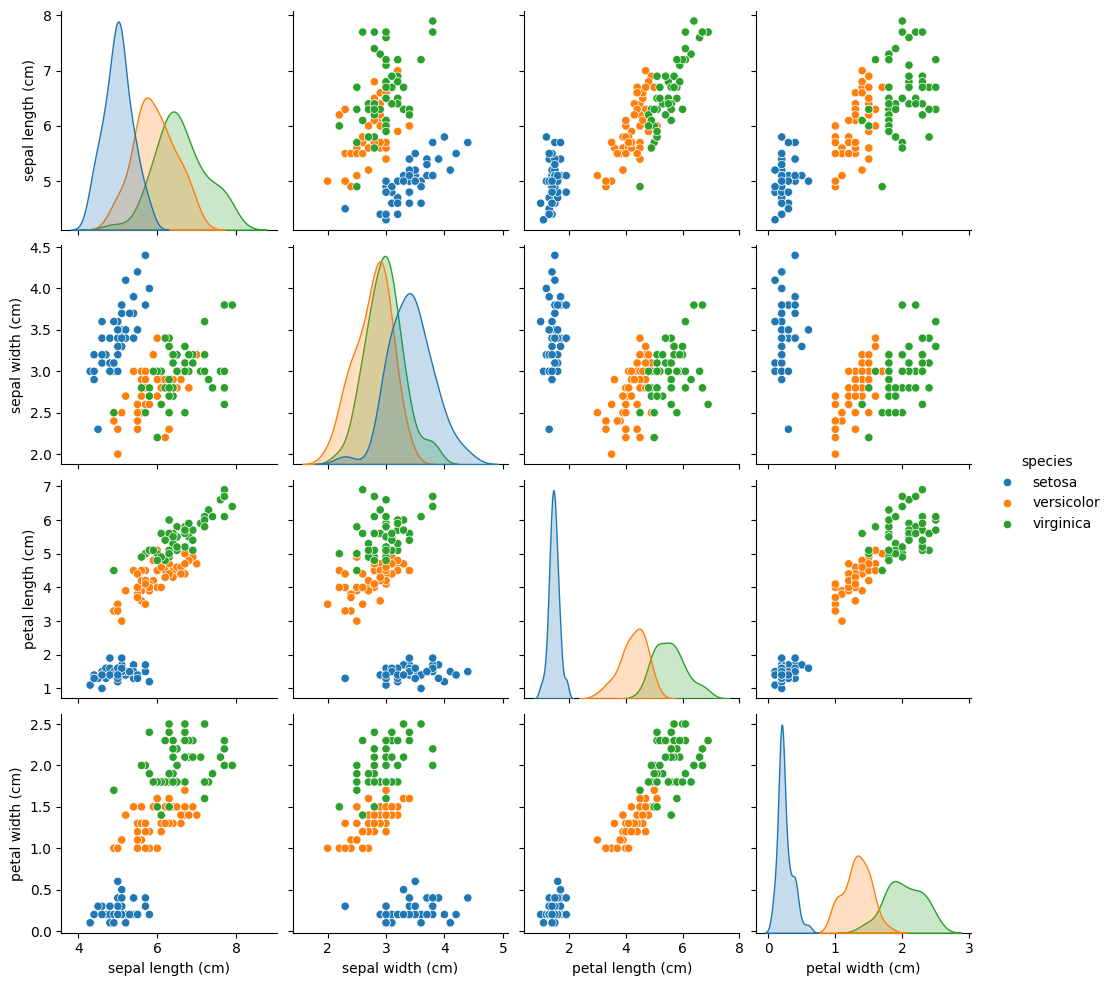

In [17]:
#Si no está instalado
# !pip install seaborn
import seaborn as sns
import pandas as pd

my_column_names=iris_meta.feature_names.copy()
my_column_names.append('species')

iris=np.concatenate((X,y[:,np.newaxis]), axis=1)

#Creamos el dataframe
df_iris = pd.DataFrame(data=iris, columns=my_column_names)

#Cambiamos el valor de la variable de salida
df_iris.loc[df_iris['species'] == 0.0, 'species'] = 'setosa'
df_iris.loc[df_iris['species'] == 1.0, 'species'] = 'versicolor'
df_iris.loc[df_iris['species'] == 2.0, 'species'] = 'virginica'


g = sns.pairplot(df_iris, hue='species')

---
## Ejercicio
Dibujar un gráfica de barras para comprobar si el problema se encuentra balenceado (pista: usar **barplot**)

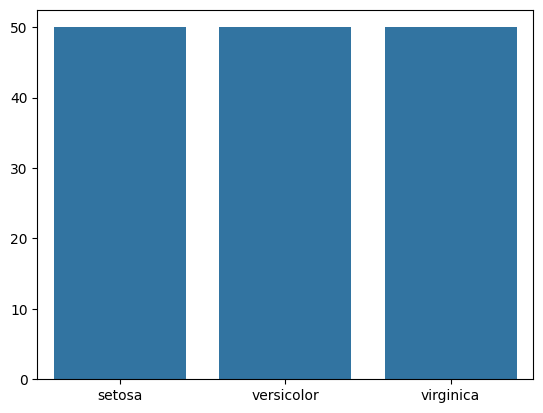

In [18]:
# Tu código AQUÍ
lista=[np.count_nonzero(y == 0), np.count_nonzero(y == 1), np.count_nonzero(y == 2)]
sns.barplot(x = ['setosa','versicolor','virginica'], y = lista)
plt.show()




# Entrenando un árbol de decisión
---


In [19]:
from sklearn import tree
# Aquí definimos el tipo de método de entrenamiento (todavía no pasa nada)
clf = tree.DecisionTreeClassifier()
# Ahora, entrenamos (*fit*) el método en el conjunto de datos (X,y)
clf.fit(X, y)
# clf **ha sido modificado** y ahora contiene el modelo entrenado

DecisionTreeClassifier()

Podemos visualizar el árbol como texto

In [20]:
text_representation = tree.export_text(clf, feature_names=iris_meta.feature_names)
print(text_representation)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



También podemos visualizar el árbol gráficamente

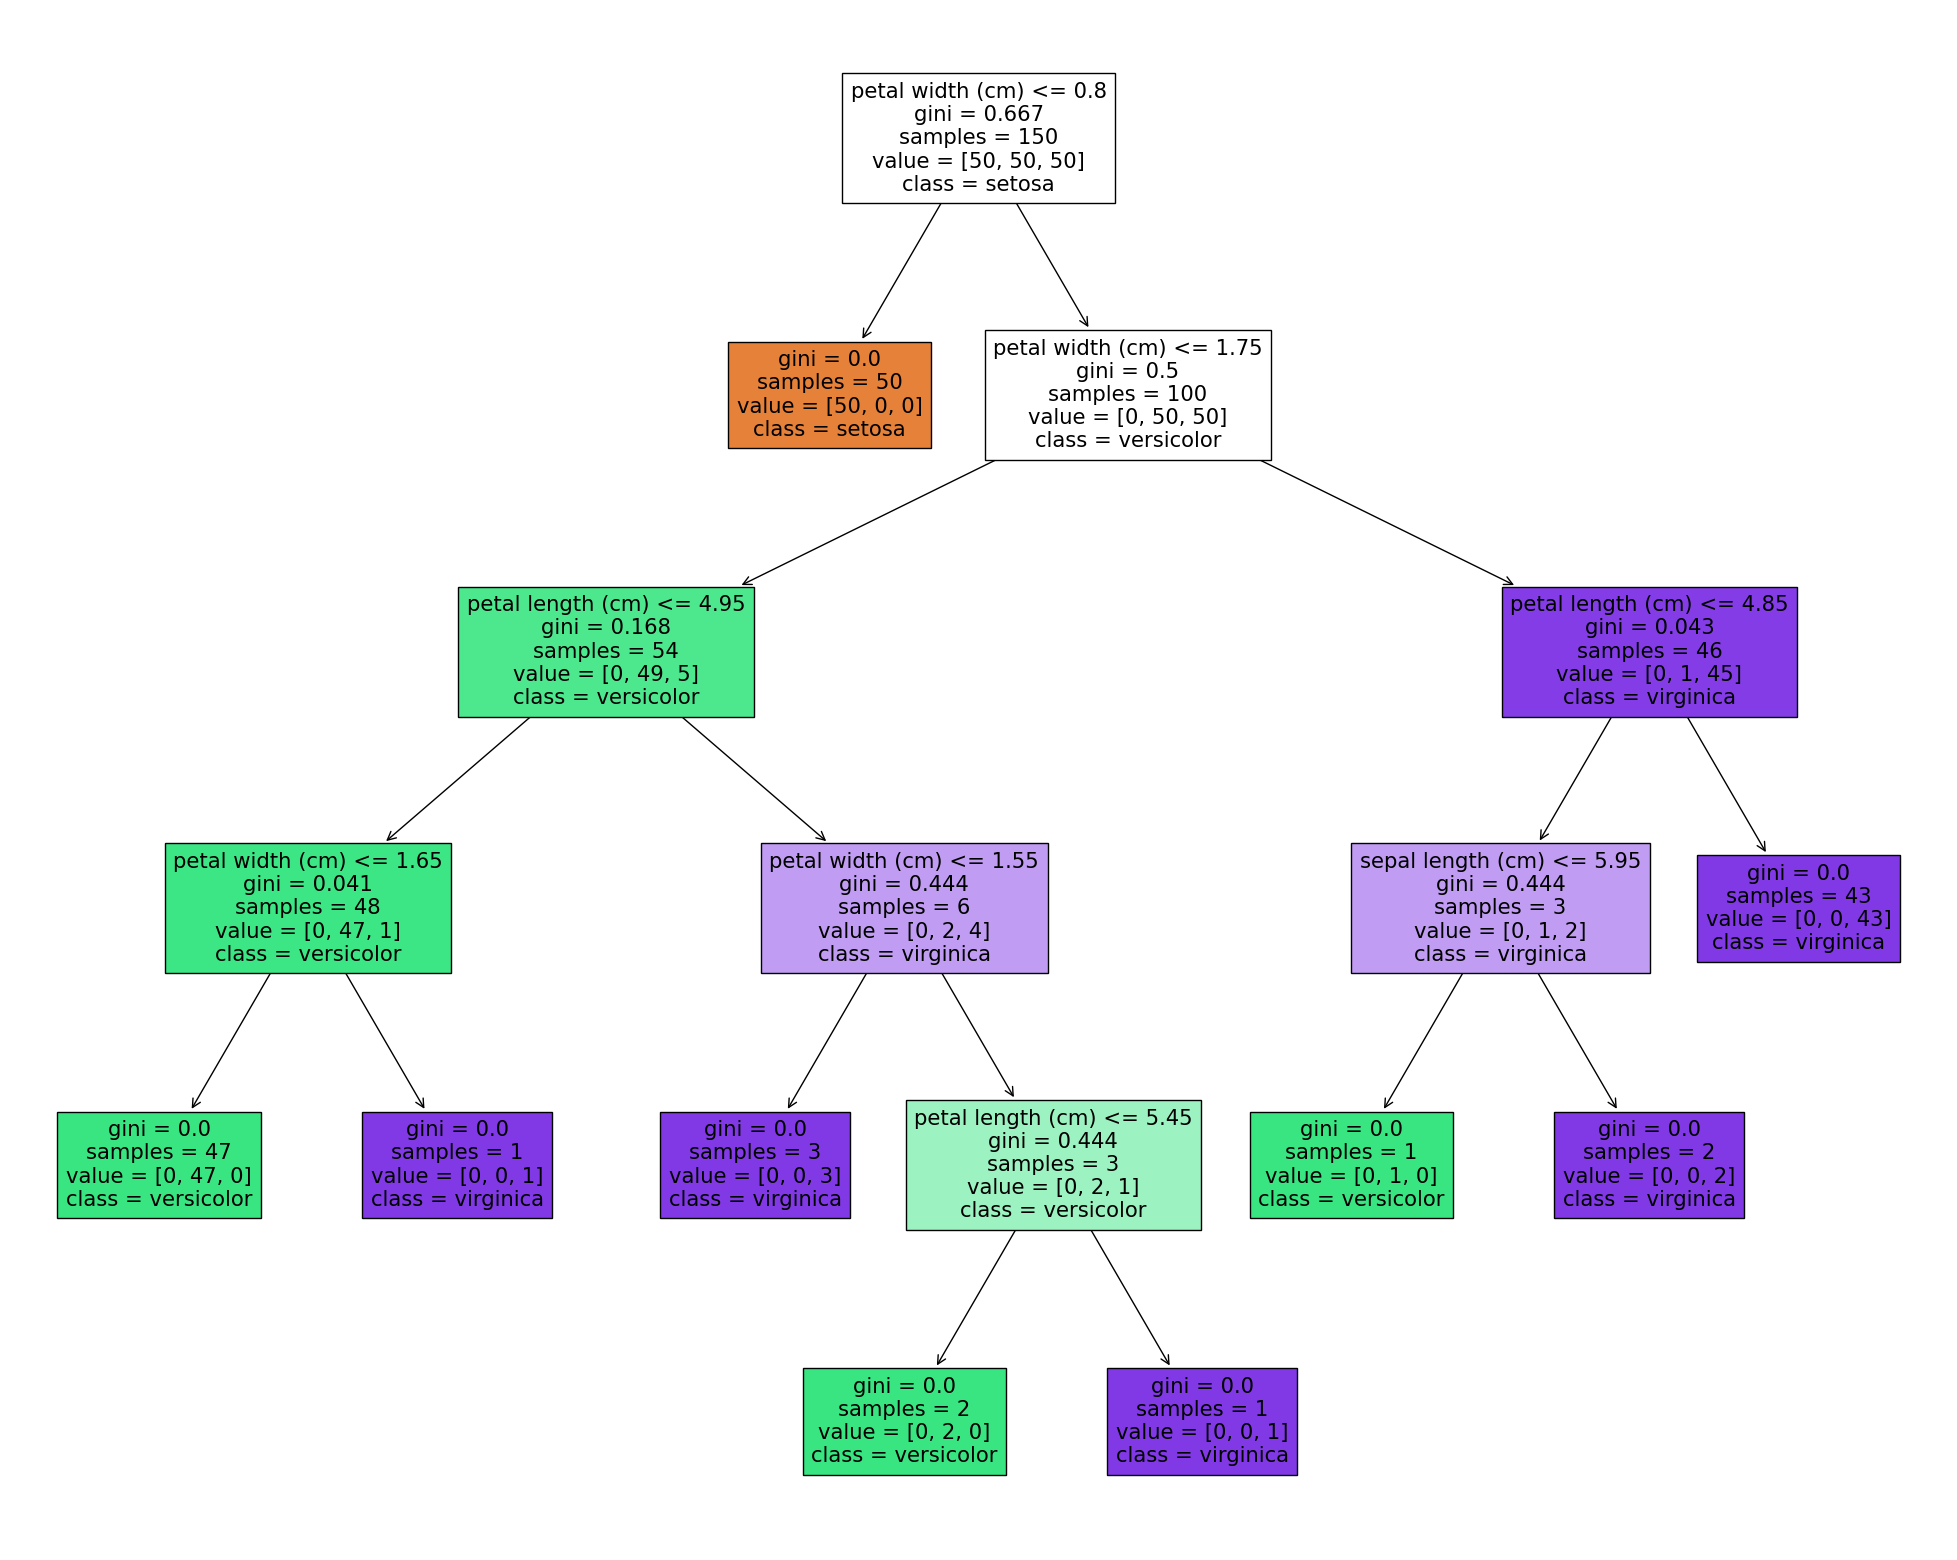

In [21]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names = iris_meta.feature_names,
                   class_names=iris_meta.target_names,
                   filled=True)

#HOLDOUT. Entrenamiento y evaluación de un árbol de decisión con un conjunto de pruebas (holdout)
---

In [22]:
from sklearn.model_selection import train_test_split

- Creamos las particiones de entrenamiento (X_train, y_train) y de prueba (X_test, y_test): 2/3 para entrenamiento, 1/3 para pruebas
- Fíjate en el **random_state=42** para la reproducibilidad (¡importante!)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train[0:5]

array([[5.7, 2.9, 4.2, 1.3],
       [7.6, 3. , 6.6, 2.1],
       [5.6, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [7.7, 2.8, 6.7, 2. ]])

Configuración de las particiones de entrenamiento y de prueba

In [25]:
print(X_train.shape, y_train.shape) # 100 instancias para entrenamiento
print(X_test.shape, y_test.shape)   # 50 instances para test

(100, 4) (100,)
(50, 4) (50,)


Imprimamos las cinco primeras instancias de entrenamiento

In [26]:
print("INPUT FEATURES:")
print(X_train[:5,:])
print("RESPONSE:")
print(y_train[:5])

INPUT FEATURES:
[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]
RESPONSE:
[1 2 1 0 2]


Si volvemos a crear la partición, será igual que antes si utilizamos el mismo *random_state*


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print("INPUT FEATURES:")
print(X_train[:5,:])

INPUT FEATURES:
[[5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.5 1.5]
 [5.1 3.5 1.4 0.2]
 [7.7 2.8 6.7 2. ]]


Pero será diferente si cambiamos *random_state*

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=24)
print("INPUT FEATURES:")
print(X_train[:5,:])

INPUT FEATURES:
[[4.7 3.2 1.3 0.2]
 [4.3 3.  1.1 0.1]
 [5.4 3.9 1.3 0.4]
 [5.5 2.6 4.4 1.2]
 [6.1 2.6 5.6 1.4]]


In [29]:
# Mantengamos la partición original (con random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

- Entrenamos el árbol con .fit
- Fíjate que usamos np.random.seed(42) para que el entrenamiento del árbol también sea reproducible (en caso de que el entrenamiento del árbol sea no determinista)

In [30]:
from sklearn import tree

# Definimos el modelo
clf = tree.DecisionTreeClassifier()
# Permitir que los resultados sean reproducibles
np.random.seed(42)
# Entrenamos el modelo
clf.fit(X_train, y_train)
# We can see that the tree is inside
print(tree.export_text(clf))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- feature_2 <= 4.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  4.95
|   |   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



Por cierto, podemos obtener ayuda de cualquier función (como .fit)

In [31]:
?clf.fit

Signature: clf.fit(X, y, sample_weight=None, check_input=True)
Docstring:
Build a decision tree classifier from the training set (X, y).

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The training input samples. Internally, it will be converted to
    ``dtype=np.float32`` and if a sparse matrix is provided
    to a sparse ``csc_matrix``.

y : array-like of shape (n_samples,) or (n_samples, n_outputs)
    The target values (class labels) as integers or strings.

sample_weight : array-like of shape (n_samples,), default=None
    Sample weights. If None, then samples are equally weighted. Splits
    that would create child nodes with net zero or negative weight are
    ignored while searching for a split in each node. Splits are also
    ignored if they would result in any single class carrying a
    negative weight in either child node.

check_input : bool, default=True
    Allow to bypass several input checking.
    Don't use this parameter u

Evaluamos el árbol, calculando las predicciones sobre el conjunto de pruebas

In [32]:
y_test_pred = clf.predict(X_test)

Podemos comprobar las predicciones para las instancias de prueba

In [33]:
print(y_test_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]


A efectos de visualización, podemos comparar las predicciones y los valores reales. Podemos ver que para los 5 primeros casos coinciden.

In [34]:
print(np.hstack((y_test_pred[:5,np.newaxis], y_test[:5,np.newaxis])))

[[1 1]
 [0 0]
 [2 2]
 [1 1]
 [1 1]]


- Pero, para evaluar el modelo en la partición de prueba, podemos calcular una métrica (precisión (accuracy) de la clasificación en este caso)
- Usamos más métricas
- Y la matriz de confusión
- Es muy alta (98%)
---

0.98
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Precision of classes: [1.     0.9375 1.    ]
Recall of classes: [1.     1.     0.9375]
Fscore of classes: [1.         0.96774194 0.96774194]
Support of classes: [19 15 16]


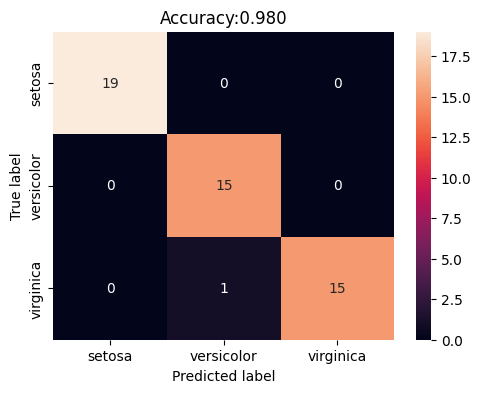

In [35]:
from sklearn import metrics
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(accuracy_tree)
result1 = metrics.classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

# We compute recall and other metrics
precision,recall,fscore,support = metrics.precision_recall_fscore_support(y_test, y_test_pred)
print("Precision of classes: {0}".format(precision))
print("Recall of classes: {0}".format(recall))
print("Fscore of classes: {0}".format(fscore))
print("Support of classes: {0}".format(support))

# Creates a confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy_tree))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Una forma de ver el rendimiento de un clasificador es utilizar las curvas ROC. Estas curvas se usan para clasificaciones binarias. Vamos a construir un clasificador que permita clasificar muestras de la clase "virginia" del resto.

---


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.88      0.94      0.91        16

    accuracy                           0.94        50
   macro avg       0.93      0.94      0.93        50
weighted avg       0.94      0.94      0.94        50

|--- feature_3 <= 1.55
|   |--- class: 0
|--- feature_3 >  1.55
|   |--- class: 1



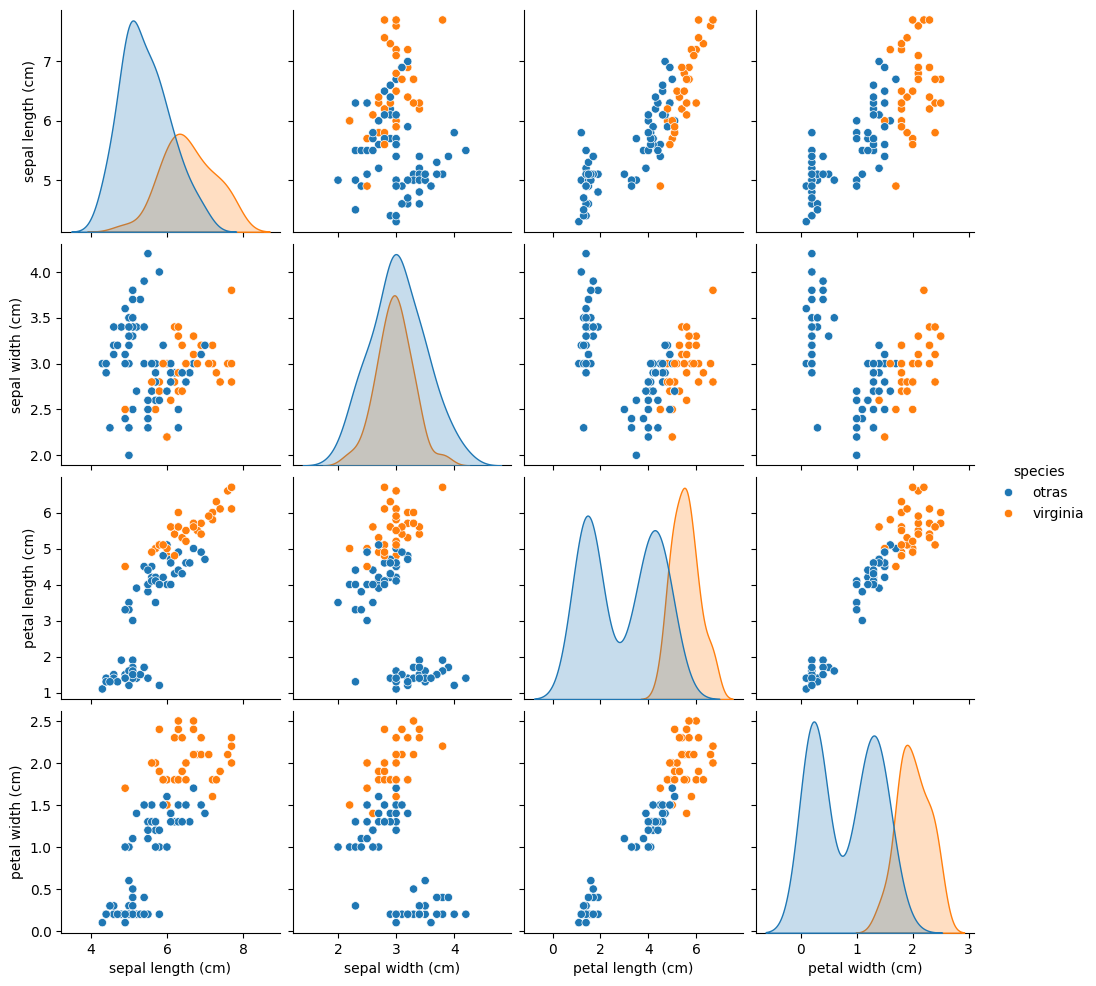

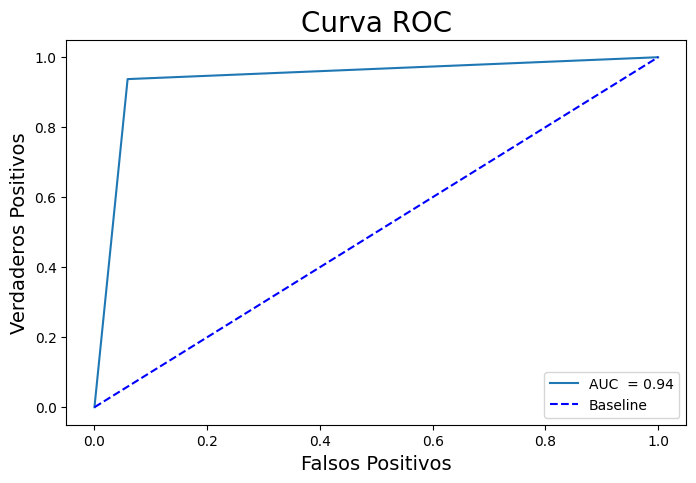

In [36]:
y_train_int = y_train.copy()
y_train_int[y_train_int == 1] = 0
y_train_int[y_train_int == 2] = 1
# Ahora tenemos una clase 0 ("setosa" y "versicolor") y 1 ("virginia")

# Igual con test
y_test_int = y_test.copy()
y_test_int[y_test_int == 1] = 0
y_test_int[y_test_int == 2] = 1

# Jugamos con "max_depth"
clf_int = tree.DecisionTreeClassifier(max_depth=1)
# Para hacerlo reproducible
np.random.seed(42)
# Entrenamos
clf_int.fit(X_train, y_train_int)

y_test_pred_int = clf_int.predict(X_test)
result1 = metrics.classification_report(y_test_int, y_test_pred_int)
print("Classification Report:",)
print (result1)

print(tree.export_text(clf_int))

iris=np.concatenate((X_train,y_train_int[:,np.newaxis]), axis=1)

#Creamos el dataframe
df_iris = pd.DataFrame(data=iris, columns=my_column_names)

#Cambiamos el valor de la variable de salida
df_iris.loc[df_iris['species'] == 0.0, 'species'] = 'otras'
df_iris.loc[df_iris['species'] == 1.0, 'species'] = 'virginia'

g = sns.pairplot(df_iris, hue='species')

probs = clf_int.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test_int, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test_int, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

Sin embargo, la precisión de 0,98 es la evaluación del modelo (estimación del rendimiento). Todavía tenemos que calcular el modelo final (el que enviará y utilizará la empresa) **utilizando todos los datos disponibles**.

In [37]:
final_clf = tree.DecisionTreeClassifier()
# Para que los resultados sean reproducibles
np.random.seed(42)
# Entrenamos (CON TODAS LAS MUESTRAS)
final_clf.fit(X, y)
# final_clf Tiene el modelo que usará la empresa
# La estimación de su accuracy la hemos obtenido antes (95%)

DecisionTreeClassifier()

Por cierto, podemos almacenar (y cargar) este modelo en un fichero. Esto se llama "persistencia del modelo"

In [38]:
from joblib import dump, load
# Save the final model to a file
dump(final_clf, 'final_tree.joblib')
# Load the tree from the file
final_clf_reloaded = load('final_tree.joblib')

A continuación, tienes el código completo

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we set our model to classification tree
clf = tree.DecisionTreeClassifier()
np.random.seed(42) # reproducibility
# We train it
clf.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = clf.predict(X_test)
# We compute accuracy
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the tree: {accuracy_tree} ")



# We finally compute the final model with all available data

final_clf = tree.DecisionTreeClassifier()
np.random.seed(42)  # reproducibility
final_clf.fit(X, y)

Accuracy of the tree: 0.98 


DecisionTreeClassifier()

---

## Ejercicio: hacer el aprendizaje, la predicción, la evaluación del modelo y la construcción del modelo final con KNN

- Para la clasificación:

from sklearn.neighbors import KNeighborsClassifier

- Para la regresión:

from sklearn.neighbors import KNeighborsRegressor

Ayuda sobre KNN en sklearn:

from sklearn.neighbors import KNeighborsClassifier

Lo definimos como:

clf = KNeighborsClassifier()

(y lo entrenamos con .fit).



In [40]:
# Tu código AQUÍ


---

# VALIDACIÓN CRUZADA. Entrenamiento y evaluación de un árbol de decisión con validación cruzada

- Primero, vamos a hacer la validación cruzada con un bucle, para que entendamos mejor el proceso
- Sin embargo (!!), es mejor hacer la validación cruzada con la función *cross_val_score*, como haremos más adelante

- *KFold* crea los grupos de validación cruzada de entrenamiento/test.
    - *shuffle* mezcla aleatoriamente los datos antes de dividir los grupos. Siempre debemos hacer esto, a menos que tengamos buenas razones para lo contrario.
    - *random_state* hace que la mezcla sea reproducible

In [41]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)


- Vamos a realizar la validación cruzada utilizando 5 agrupaciones.
- En cada iteración:
    - Entrenamos un modelo en las agrupaciones de entrenamiento
    - Calculamos predicciones en las agrupaciones de test
    - Calculamos la métrica (precisión - accuracy) y la almacenamos.
- Cuando el bucle de validación cruzada termina, calculamos la media (y std)   

TRAIN: [0 1 2 3 4] ... TEST: [ 9 12 18 19 26] ...
The accuracy for this crossval iteration is: 1.0

TRAIN: [1 2 3 5 6] ... TEST: [ 0  4 10 11 15] ...
The accuracy for this crossval iteration is: 0.9666666666666667

TRAIN: [0 1 2 3 4] ... TEST: [ 5  7 23 24 25] ...
The accuracy for this crossval iteration is: 0.9333333333333333

TRAIN: [0 1 4 5 7] ... TEST: [ 2  3  6  8 13] ...
The accuracy for this crossval iteration is: 0.9333333333333333

TRAIN: [0 2 3 4 5] ... TEST: [ 1 14 20 21 37] ...
The accuracy for this crossval iteration is: 0.9333333333333333

All the accuracies are: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
And the average crossvalidation accuracy is: 0.95 +- 0.03


Text(0, 0.5, 'Accuracy')

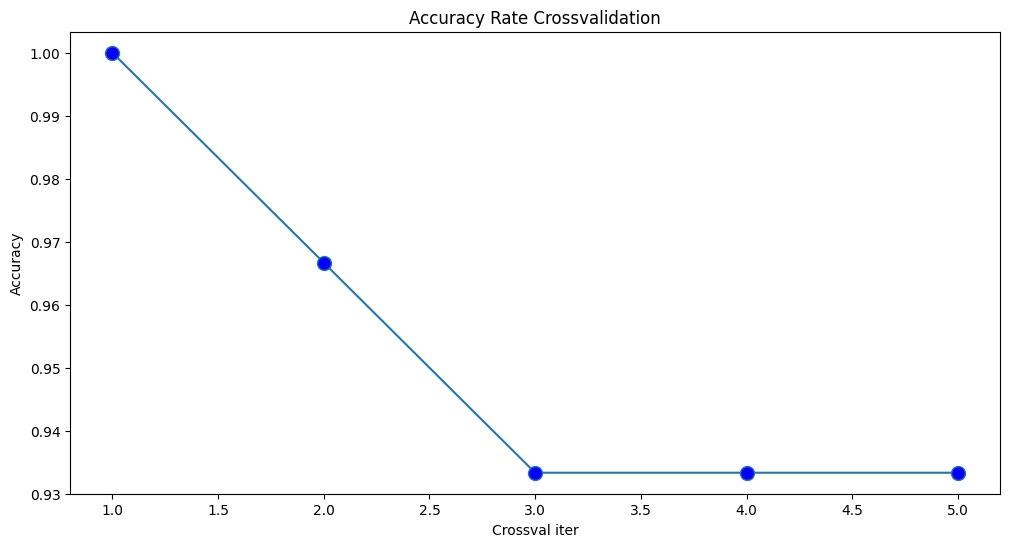

In [42]:
np.random.seed(42) # reproducibility

# This variable will contain the 5 crossvalidation accuracies, one per iteration
scores = []

for train_index, test_index in cv.split(X):
    print(f"TRAIN: {train_index[:5]} ...", f"TEST: {test_index[:5]} ...")
    # Getting the actual training and testing partitions out of the indices
    X_train, X_test = X[train_index,:], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

    # Training the model for this particular crossvalidation iteration
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)

    print(f"The accuracy for this crossval iteration is: {accuracy_tree}")
    print()
    # We add this accuracy to the list
    scores.append(accuracy_tree)

# Transforming scores from list to numpy array (this is just a technicallity)
scores = np.array(scores)
print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

# Trace the accuracy of all k values
plt.figure(figsize=(12, 6))
plt.plot([1, 2, 3, 4, 5], scores,marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate Crossvalidation')
plt.xlabel('Crossval iter')
plt.ylabel('Accuracy')

Si estuvieramos en un problema desbalanceado, podríamos usar *Stratified k-fold cross-validation*. No es el caso, pero para practicar, podemos escribir la función de validación usando *StratifiedKFold*

- Para entender lo que hace la validación cruzada, hemos programado el bucle explícitamente
- Pero la validación cruzada se hace típicamente por medio de la función *cross_val_score*, como a continuación

In [43]:
from sklearn.model_selection import cross_val_score, KFold

# create a k-fold crossvalidation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = tree.DecisionTreeClassifier()

# Making model training reproducible
np.random.seed(42)

scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv)

print(f"All the accuracies are: {scores}")
print(f"And the average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

All the accuracies are: [1.         0.96666667 0.93333333 0.93333333 0.93333333]
And the average crossvalidation accuracy is: 0.95 +- 0.03


Si estuvieramos en un problema desbalanceado, podríamos usar *Stratified k-fold cross-validation*. No es el caso, pero para practicar, podemos escribir la función de validación usando *StratifiedKFold*

In [44]:
# Tu código AQUÍ



- Vemos que para nuestro caso no hay diferencia.
- 0.95 es la evaluación del modelo (estimación del rendimiento).
- Pero el modelo final debe entrenarse con todos los datos disponibles.

In [45]:
final_clf = tree.DecisionTreeClassifier()
# Making results reproducible, in case training a tree contains random decisions
np.random.seed(42)
# Now, we train it
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company
# Its estimated accuracy is what we computed before

DecisionTreeClassifier()

A continuación, tienes el código completo para la evaluación de validación cruzada (y también la obtención del modelo final al final)

In [46]:
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import KFold, cross_val_score

# create a k-fold crossvalidation iterator of k=5 folds
# shuffle = True randomly rearranges the dataframe
# random_state = 42 is for making the folds reproducible
cv = KFold(n_splits=5, shuffle=True, random_state=42)
clf = tree.DecisionTreeClassifier()

# Making model training reproducible
np.random.seed(42)

scores = cross_val_score(clf, X, y, scoring='accuracy', cv = cv)

# print(f"All the accuracies are: {scores}")
print(f"The average crossvalidation accuracy is: {scores.mean():.2f} +- {scores.std():.2f}")

final_clf = tree.DecisionTreeClassifier()
# Making results reproducible, in case training a tree contains random decisions
np.random.seed(42)
# Now, we train it
final_clf.fit(X, y)
# final_clf contains the model that would be used by the company

The average crossvalidation accuracy is: 0.95 +- 0.03


DecisionTreeClassifier()

# Modificación de los hiperparámetros de un árbol de decisión

---

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  

In [47]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Veamos el efecto de cambiar de gini a entropía. Aquí utilizamos holdout. Parece que los resultados son exactamente los mismos.

In [48]:
# This loop checks what happens with the two criterions
for criterion in ["gini", "entropy"]:
    clf = tree.DecisionTreeClassifier(criterion=criterion)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With {criterion}: {accuracy_tree:.2f}")

With gini: 0.98
With entropy: 0.98


Veamos los efectos de *maximum_depth*. "None" representa la máxima profundidad posible.

In [49]:
for max_depth in [1,2,3,None]:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With max_depth {max_depth}: {accuracy_tree:.2f}")

With max_depth 1: 0.68
With max_depth 2: 0.98
With max_depth 3: 0.98
With max_depth None: 0.98


Parece que max_depth=2 es suficiente. Visualicemos un árbol con profundidad máxima de 2

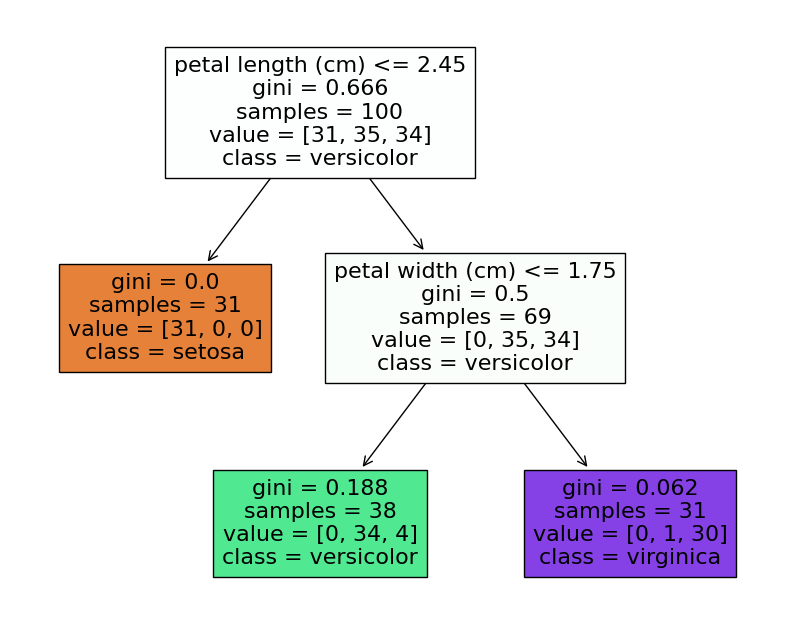

In [50]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
clf = tree.DecisionTreeClassifier(max_depth=2)
np.random.seed(42)
clf.fit(X_train,y_train)

_ = tree.plot_tree(clf,
                   feature_names = iris_meta.feature_names,
                   class_names=iris_meta.target_names,
                   filled=True)

Podemos comprobar si al limitar la profundidad del árbol hemos perdido precisión

Classification Report (max_depth=2):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



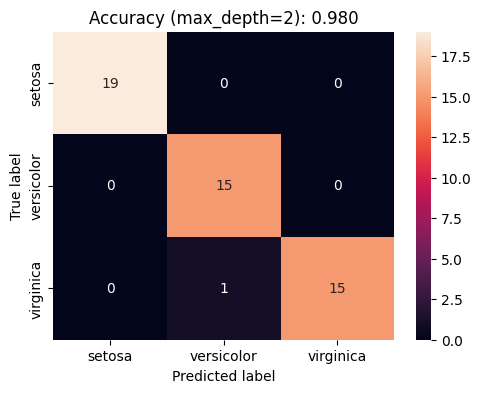

In [51]:
import pandas as pd
import seaborn as sns

result1 = metrics.classification_report(y_test, y_test_pred)
print("Classification Report (max_depth=2):",)
print (result1)

# Creates a confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_pred)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'],
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy (max_depth=2): {0:.3f}'.format(accuracy_tree))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Veamos los efectos de *min_samples_split*. El valor por defecto es 2.

In [52]:
for min_samples in [2,10,20,30,100]:
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With min_samples_split {min_samples}: {accuracy_tree:.2f}")


With min_samples_split 2: 0.98
With min_samples_split 10: 0.98
With min_samples_split 20: 0.98
With min_samples_split 30: 0.98
With min_samples_split 100: 0.68


Por último, comprobemos otro hiperparámetro llamado *min_impurity_decrease*: significa que sólo se crea un nuevo nivel del árbol si la ganancia de información (es decir, la disminución de la entropía o gini) es mayor que el valor de *min_impurity_decrease*. Es otra forma de controlar la profundidad del árbol.

With min_impurity_decrease 0.0: 0.98
With min_impurity_decrease 0.2222222222222222: 0.98
With min_impurity_decrease 0.4444444444444444: 0.30
With min_impurity_decrease 0.6666666666666666: 0.30
With min_impurity_decrease 0.8888888888888888: 0.30
With min_impurity_decrease 1.1111111111111112: 0.30
With min_impurity_decrease 1.3333333333333333: 0.30
With min_impurity_decrease 1.5555555555555554: 0.30
With min_impurity_decrease 1.7777777777777777: 0.30
With min_impurity_decrease 2.0: 0.30


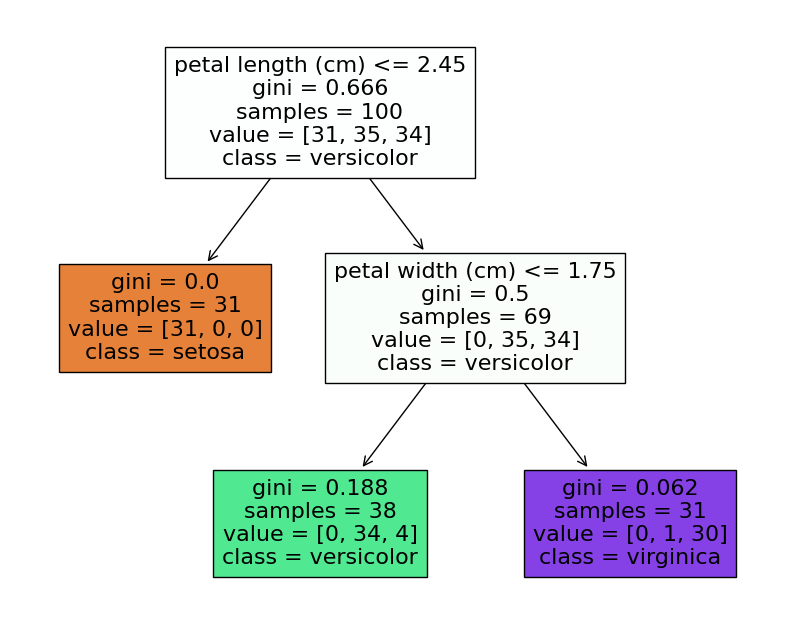

In [53]:
for min_impurity_decrease in np.linspace(0,2,num=10):
    clf = tree.DecisionTreeClassifier(min_impurity_decrease=min_impurity_decrease)
    np.random.seed(42)
    clf.fit(X_train,y_train)
    y_test_pred = clf.predict(X_test)
    accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
    print(f"With min_impurity_decrease {min_impurity_decrease}: {accuracy_tree:.2f}")

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))

clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
np.random.seed(42)
clf.fit(X_train,y_train)

_ = tree.plot_tree(clf,
                   feature_names = iris_meta.feature_names,
                   class_names=iris_meta.target_names,
                   filled=True)

##Ejercicio: comprobar el efecto de cambiar el hiperparámetro número de vecinos de KNN.

Ayuda sobre KNN en sklearn:

from sklearn.neighbors import KNeighborsClassifier

Lo definimos como:

clf = KNeighborsClassifier()

(y lo entrenamos con .fit).

Más ayuda del clasificador KNN de sklearn:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Cambiamos el parámetro *n_neighbors* con valores de 1 a 100 tomados de cinco en cinco (*range(1,100,5)*), por ejemplo.


Puedes comprobar lo que ocurre al cambiar el hiperparámetro *weights*: :

- ‘uniform’ : Todos los puntos de cada vecindario se ponderan por igual.

- ‘distance’ : Ponderar los puntos por la inversa de su distancia. Es decir, los vecinos más cercanos de un nuevo punto de consulta tendrán una mayor influencia que los vecinos más alejados.

---



In [54]:
# Tu código AQUÍ



# Tratamiento de variables categóricas en DecisionTreeClassifier
---
- La implementación de árboles de Sklearn **NO PUEDE** tratar con variables categóricas (en la mayoría de los casos).
- Deben convertirse en variables ficticias (one-hot-encoding).
- Los árboles Sklearn tampoco pueden tratar con valores faltantes (missing values)

El flujo de trabajo típico cuando se trabaja con scikit-learn es:

1. Cargar los datos como un Pandas dataframe

2. LLevar a cabo un proceso EDA (Exploratory Data Analysis) para entender/comprender sus datos. Y esto significa:
  - Cuántas instancias y atributos hay
  - Qué tipo de atributos hay (numéricos o categóricos). Esto se hace para comprobar si hay características categóricas que deban ser codificadas (como dummies / one-hot-encoding)
  - Qué atributos tienen valores faltantes, y cuántos
  - Si se trata de un problema de clasificación o de regresión (variable de salida es una clase o un valor continuo), y en caso de clasificación, si la clase está desequilibrada.

3. Codificar el Pandas dataframe como una matriz numpy (transformar los valores categóricos y los valores faltantes)

4. Diseñar modelos de aprendizaje automático con scikit-learn

In [55]:
# This is for uploading tennis.txt from your hard drive into Colab

#from google.colab import files
#import io
#uploaded = files.upload()
#tennis_tmp = io.BytesIO(uploaded['tennis.txt'])

In [56]:
# There are other ways of accessing files from google colab
# https://neptune.ai/blog/google-colab-dealing-with-files
# Code below allows to mount your google drive and load data directly from GD
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

In [ ]:
import os
# Cambia el directorio donde tengas los tutoriales con el fichero "tennis.txt"
os.chdir(".")

In [ ]:
import pandas as pd
tennis_df = pd.read_csv("tennis.txt", sep=",")

Podemos comprobar el valos de las primeras instancias del dataframe

In [ ]:
tennis_df.head()

,Sky,Temperature,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes


El dataset es pequeño y podremos visualizarlo por completo

In [ ]:
tennis_df

,Sky,Temperature,Humidity,Windy,Play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [ ]:
print('The shape of the data table is:')
print('===============================')
print(tennis_df.shape)
print()

print('The types of the attributes are:')
print('================================')
tennis_df.info()

print()

print('How many missing values per attribute:')
print('======================================')
print(tennis_df.isnull().sum())

print()

print('Fraction of missing values per attribute:')
print('======================================')
print(tennis_df.isnull().mean())


The shape of the data table is:
(14, 5)

The types of the attributes are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sky          14 non-null     object
 1   Temperature  14 non-null     int64 
 2   Humidity     14 non-null     int64 
 3   Windy        14 non-null     bool  
 4   Play         14 non-null     object
dtypes: bool(1), int64(2), object(2)
memory usage: 590.0+ bytes

How many missing values per attribute:
Sky            0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

Fraction of missing values per attribute:
Sky            0.0
Temperature    0.0
Humidity       0.0
Windy          0.0
Play           0.0
dtype: float64


Por último, comprobamos si el dataset se encuentra desequilibrado. Vemos que no está demasiado desequilibrado.

In [ ]:
print(tennis_df.Play.value_counts())

print()

print(tennis_df['Play'].value_counts())

print()

print(tennis_df['Play'].value_counts()/tennis_df['Play'].count())

yes    9
no     5
Name: Play, dtype: int64

yes    9
no     5
Name: Play, dtype: int64

yes    0.642857
no     0.357143
Name: Play, dtype: float64


Ahora vamos a codificar:
- Nuestras características categóricas (Sky y Windy)
- La variable de salida (la clase: Play)

Pero primero, vamos a separar la tabla de datos en entradas (X) y salidas (y)

Vamos a utilizar un ColumnTransformer, que permite procesar sólo algunas columnas en particular, y deja a los demás como están


In [ ]:
y_df = tennis_df['Play']
print(y_df)

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object


In [ ]:
X_df = tennis_df.drop('Play', axis=1)
print(X_df)

         Sky  Temperature  Humidity  Windy
0      sunny           85        85  False
1      sunny           80        90   True
2   overcast           83        86  False
3      rainy           70        96  False
4      rainy           68        80  False
5      rainy           65        70   True
6   overcast           64        65   True
7      sunny           72        95  False
8      sunny           69        70  False
9      rainy           75        80  False
10     sunny           75        70   True
11  overcast           72        90   True
12  overcast           81        75  False
13     rainy           71        91   True


Utilizaremos la función ColumnTransformer, que permite procesar sólo algunas columnas en particular, y deja las demás intactas (*passthrough*). En este caso, procesaremos sólo las categóricas.

La salida de esta transformación es una matriz numpy (!!)


In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_features = ['Temperature', 'Humidity']
categorical_features = ['Sky', 'Windy']
"""
preprocessor = ColumnTransformer(
    transformers = [
                    ('categorical', OneHotEncoder(handle_unknown='ignore'),
                                    categorical_features)
                    ],
                    remainder='passthrough'
)
"""
preprocessor = ColumnTransformer(
    transformers = [
                    ('categorical', OneHotEncoder(handle_unknown='ignore'),
                                    categorical_features),
                    ('scaler', MinMaxScaler(),
                                    numeric_features)
                    ],
                    remainder='passthrough'
)

preprocessor.fit(X_df)
X = preprocessor.transform(X_df)

# Notice that now we have 7 columnos
print(X.shape)
print()

# Notice that now the type of the data matrix is numpy, which can already be used by sklearn
print(type(X))
print()

# The first three columns are the dummies for Sky, the second two columns are the dummies for Windy
# The last two columns are Temperature and Humidity, untouched
# Please, notice that the order of columns has changed (not important, in principle), but the last versions of sklearn
# return the names of variables, which is useful to understand where the variables come from

print(X)

from pprint import pprint
pprint(list(preprocessor.get_feature_names_out()))

(14, 7)

<class 'numpy.ndarray'>

[[0.         0.         1.         1.         0.         1.
  0.64516129]
 [0.         0.         1.         0.         1.         0.76190476
  0.80645161]
 [1.         0.         0.         1.         0.         0.9047619
  0.67741935]
 [0.         1.         0.         1.         0.         0.28571429
  1.        ]
 [0.         1.         0.         1.         0.         0.19047619
  0.48387097]
 [0.         1.         0.         0.         1.         0.04761905
  0.16129032]
 [1.         0.         0.         0.         1.         0.
  0.        ]
 [0.         0.         1.         1.         0.         0.38095238
  0.96774194]
 [0.         0.         1.         1.         0.         0.23809524
  0.16129032]
 [0.         1.         0.         1.         0.         0.52380952
  0.48387097]
 [0.         0.         1.         0.         1.         0.52380952
  0.16129032]
 [1.         0.         0.         0.         1.         0.38095238
  0.80645161]

Nos puede interesar que para las variables booleanas sólo codifique un variable.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# numeric_features = ['Temperature', 'Humidity']
categorical_features = ['Sky', 'Windy']

preprocessor = ColumnTransformer(
    transformers = [
                    ('categorical', OneHotEncoder(drop='if_binary',
                                                  handle_unknown='ignore'),
                                    categorical_features)
                    ],
                    remainder='passthrough'
)

preprocessor.fit(X_df)
X = preprocessor.transform(X_df)

# Notice that now we have 6 columns
print(X.shape)
print()

# Notice that now the type of the data matrix is numpy, which can already be used by sklearn
print(type(X))
print()

# The first three columns are the dummies for Sky, the second column is the dummy for Windy
# The last two columns are Temperature and Humidity, untouched
# Please, notice that the order of columns has changed, but the last versions of sklearn
# return the names of variables, which is useful to understand where the variables come from

print(X)

from pprint import pprint
pprint(list(preprocessor.get_feature_names_out()))

(14, 6)

<class 'numpy.ndarray'>

[[ 0.  0.  1.  0. 85. 85.]
 [ 0.  0.  1.  1. 80. 90.]
 [ 1.  0.  0.  0. 83. 86.]
 [ 0.  1.  0.  0. 70. 96.]
 [ 0.  1.  0.  0. 68. 80.]
 [ 0.  1.  0.  1. 65. 70.]
 [ 1.  0.  0.  1. 64. 65.]
 [ 0.  0.  1.  0. 72. 95.]
 [ 0.  0.  1.  0. 69. 70.]
 [ 0.  1.  0.  0. 75. 80.]
 [ 0.  0.  1.  1. 75. 70.]
 [ 1.  0.  0.  1. 72. 90.]
 [ 1.  0.  0.  0. 81. 75.]
 [ 0.  1.  0.  1. 71. 91.]]
['categorical__Sky_overcast',
 'categorical__Sky_rainy',
 'categorical__Sky_sunny',
 'categorical__Windy_True',
 'remainder__Temperature',
 'remainder__Humidity']


A veces lleva mucho tiempo enumerar todas las columnas categóricas. Podemos utilizar seleccionar los tipos de columnas que queremos transformar.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector

# numeric_features = ['Temperature', 'Humidity']
categorical_features = ['Sky', 'Windy']

preprocessor = ColumnTransformer(
    transformers = [
                    ('categorical', OneHotEncoder(drop='if_binary',
                                                  handle_unknown='ignore'),
                                    selector(dtype_include=["object","bool"]))
                    ],
                    remainder='passthrough'
)

preprocessor.fit(X_df)
X = preprocessor.transform(X_df)

# Notice that now we have 6 columns
print(X.shape)
print()

# Notice that now the type of the data matrix is numpy, which can already be used by sklearn
print(type(X))
print()

# The first three columns are the dummies for Sky, the second two columns are the dummies for Windy
# The last two columns are Temperature and Humidity, untouched
# Please, notice that the order of columns has changed (not important, in principle)

print(X)

(14, 6)

<class 'numpy.ndarray'>

[[ 0.  0.  1.  0. 85. 85.]
 [ 0.  0.  1.  1. 80. 90.]
 [ 1.  0.  0.  0. 83. 86.]
 [ 0.  1.  0.  0. 70. 96.]
 [ 0.  1.  0.  0. 68. 80.]
 [ 0.  1.  0.  1. 65. 70.]
 [ 1.  0.  0.  1. 64. 65.]
 [ 0.  0.  1.  0. 72. 95.]
 [ 0.  0.  1.  0. 69. 70.]
 [ 0.  1.  0.  0. 75. 80.]
 [ 0.  0.  1.  1. 75. 70.]
 [ 1.  0.  0.  1. 72. 90.]
 [ 1.  0.  0.  0. 81. 75.]
 [ 0.  1.  0.  1. 71. 91.]]


Ahora, necesitamos codificar la clase (variable de salida) con enteros. Lo hacemos con *LabelEncoder*.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_df)

y = le.transform(y_df)
print(y)

# Actually, it seems that sklearn can use the original y_df, so we could have done y = y_df

[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Por último, tenemos el código para evaluar los árboles de decisión y construir el modelo final.
Lo aplicamos a nuestro modelo (X,y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we set our model to classification tree
clf = tree.DecisionTreeClassifier()
np.random.seed(42) # reproducibility
# We train it
clf.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = clf.predict(X_test)
# We compute accuracy
accuracy_tree = metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the tree: {accuracy_tree} ")
result1 = metrics.classification_report(y_test, y_test_pred)
print("Classification Report:",)
print (result1)

# We finally compute the final model with all available data

final_clf = tree.DecisionTreeClassifier()
np.random.seed(42)  # reproducibility
final_clf.fit(X, y)

Accuracy of the tree: 0.4 
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      0.67      0.57         3

    accuracy                           0.40         5
   macro avg       0.25      0.33      0.29         5
weighted avg       0.30      0.40      0.34         5



DecisionTreeClassifier()

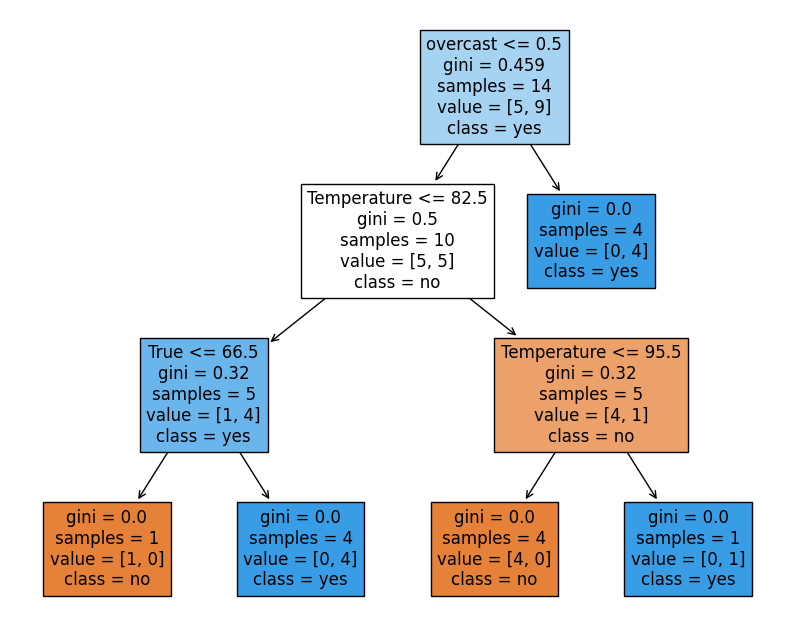

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))

_ = tree.plot_tree(final_clf,
                   feature_names = list(sorted(X_df['Sky'].unique())) + list(sorted(X_df['Windy'].unique())) + ['Temperature', 'Humidity'],
                   class_names= list(sorted(y_df.unique())),
                   filled=True)

In [ ]:
!pip install statsmodels

Dado que se trata de un problema de clasificación de 2 clases, podemos construir un intervalo de confianza para la precisión.
Podemos ver que es muy inexacta ...

In [ ]:
from statsmodels.stats.proportion import proportion_confint
print(f"Only {len(y_test)} instances on the testing partition")
print(f"Tree accuracy: {accuracy_tree} ")
proportion_confint(len(y_test)* accuracy_tree, len(y_test), method="wilson" )

Una clasificación bastante desastrosa, lo podemos comprobar viendos sus valores AUC
## Ejercicio
Dibujar la curva ROC con el valor AUC

---

In [ ]:
# Tu código AQUÍ




# Árboles de regresión con evaluación holdout

Carguemos el dataset de Boston y comprobemos su descripción. Sus datos sobre precios de la vivienda en función de las características de la zona

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from sklearn.datasets import fetch_california_housing
housing_meta = fetch_california_housing()

X = housing_meta.data
y = housing_meta.target

In [ ]:
print(housing_meta.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
print(housing_meta.keys())
print(X.shape, y.shape)


dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
(20640, 8) (20640,)


Comencemos con un pre-proceso y comprobar si hay valores nulos

In [ ]:
# Lo pasamos a un data frame para comprobar su contenido
housing = pd.DataFrame(housing_meta.data, columns=housing_meta.feature_names)
# Añadimos la variable objetivo a este data frame
housing['MEDV'] = housing_meta.target
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Comprobamos si tienen valores nulos las columnas

In [ ]:
housing.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
MEDV          0
dtype: int64

Pintamos la distribución de los valores de la variable objetivo

C:\Users\189lu\AppData\Local\Temp\ipykernel_20928\1049844032.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(housing['MEDV'], bins=30)


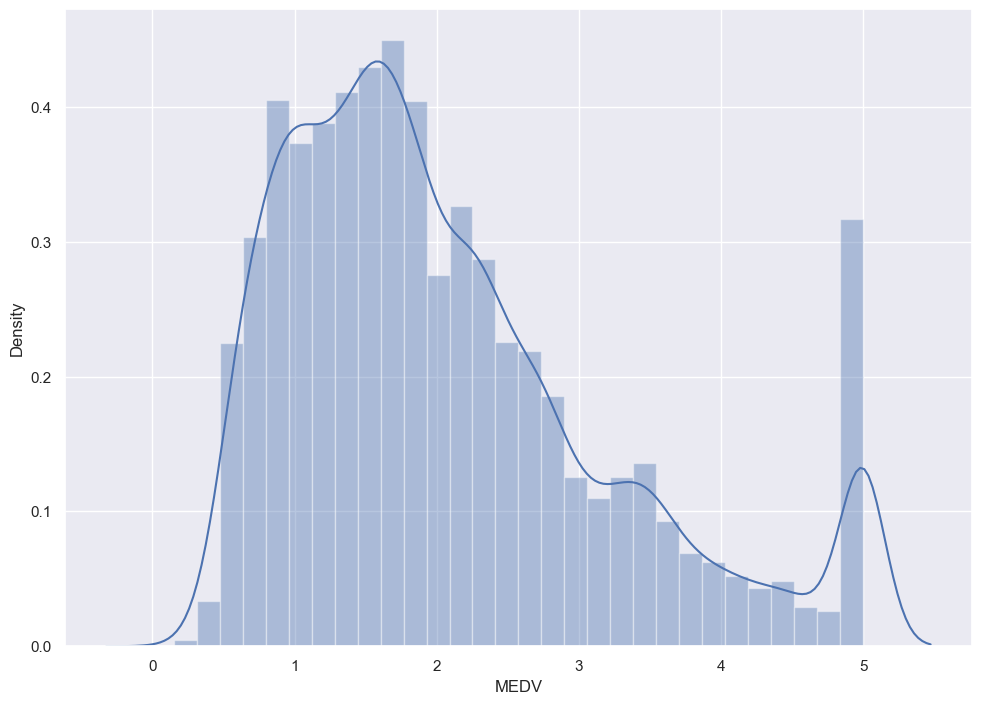

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(housing['MEDV'], bins=30)
plt.show()

Parece que sigue una distribución normal con algunos outliers (podríamos pensar en eliminarlos). Pasemos a analizar la correlación de las variables.

<Axes: >

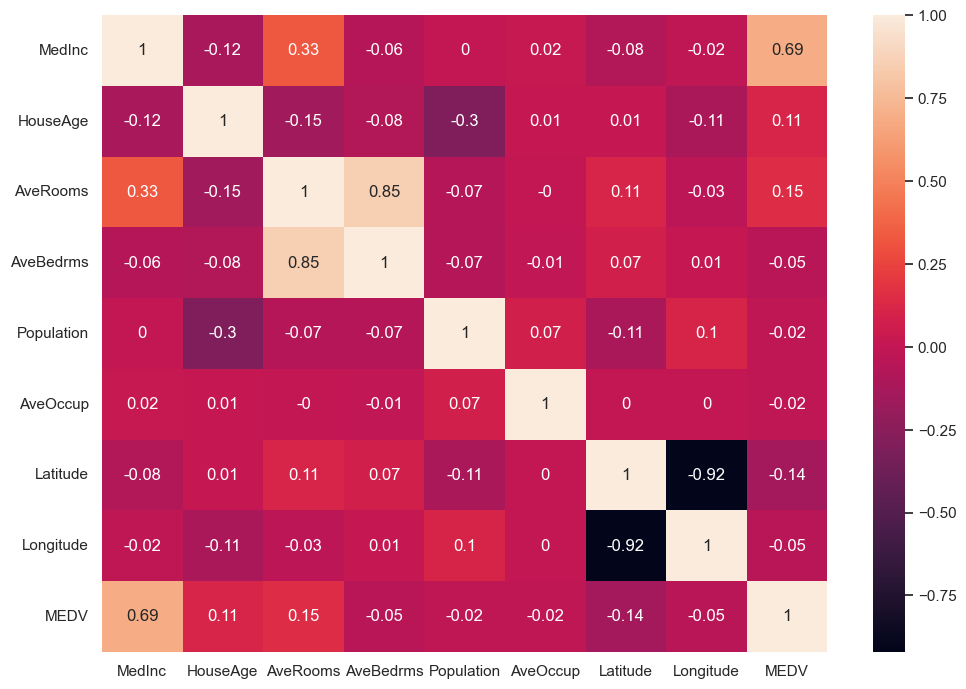

In [ ]:
correlation_matrix = housing.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

Podemos ver ciertas cosas para más adelante:
- Las variables `'Longitude'` y `'Latitude'` tienen una alta correlación (-0.92). ¿Es necesario tener las dos en el modelo que voy a construir?
- La variable objetivo `'MDEV'` está bastante correlada con la variable `'MedInc'` (0.69). ¿Sería suficiente generar un modelo con sólo esta variable? Vamos a dibujar la distribucción de los puntos de estas dos variables

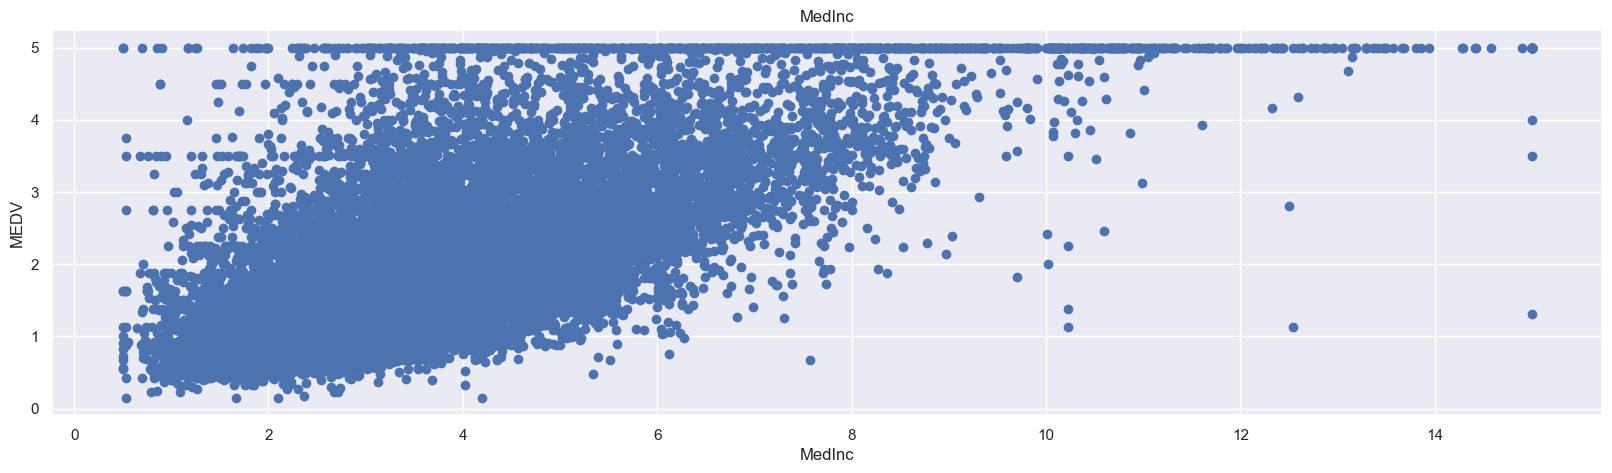

In [ ]:
plt.figure(figsize=(20, 5))

features = ['MedInc']
target = housing['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = housing[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

El principal cambio es que utilizamos un DecisionTreeRegressor y la métrica es ahora RMSE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Here, we set our model to classification tree
regr = tree.DecisionTreeRegressor()
np.random.seed(42) # reproducibility
# We train it
regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_tree = metrics.r2_score(y_test, y_test_pred)
print(f"RMSE of the tree: {rmse_tree}")
print(f"R2 of the tree: {r2_tree}")

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

RMSE of the tree: 0.7389833060012664
R2 of the tree: 0.5901998494133869


¿Es mejor que un regresor trivial?

In [ ]:
from sklearn.dummy import DummyRegressor
regr_mean = DummyRegressor(strategy="mean")
regr_mean.fit(X_train, y_train)
rmse_mean = np.sqrt(metrics.mean_squared_error(y_test, regr_mean.predict(X_test)))
r2_mean = metrics.r2_score(y_test, regr_mean.predict(X_test))

print(f"RMSE of the tree: {rmse_tree}")
print(f"RMSE of dummy(mean): {rmse_mean}")
print(f"R2 of the tree: {r2_tree}")
print(f"R2 of dummy(mean): {r2_mean}")
print(f"RMSE ratio tree/dummy(mean): {rmse_tree/rmse_mean}")
print(f"R2 ratio tree/dummy(mean): {r2_tree/r2_mean}")

RMSE of the tree: 0.7389833060012664
RMSE of dummy(mean): 1.15439409553007
R2 of the tree: 0.5901998494133869
R2 of dummy(mean): -2.5448582275933163e-05
RMSE ratio tree/dummy(mean): 0.6401482031679511
R2 ratio tree/dummy(mean): -23191.855758956815


¿Y MAE?

In [ ]:
mae_tree = metrics.mean_absolute_error(y_test, y_test_pred)

from sklearn.dummy import DummyRegressor
regr_median = DummyRegressor(strategy="median")
regr_median.fit(X_train, y_train)
mae_median = metrics.mean_absolute_error(y_test, regr_median.predict(X_test))

print(f"MAE of the tree: {mae_tree}")
print(f"MAE of dummy(median): {mae_median}")
print(f"MAE ratio tree/dummy(median): {mae_tree/mae_median}")

MAE of the tree: 0.47762681738109225
MAE of dummy(median): 0.8865130930710511
MAE ratio tree/dummy(median): 0.5387701784826454


El árbol tiene más de 10 niveles y es muy difícil de visualizar. Visualicemos uno con sólo cuatro niveles

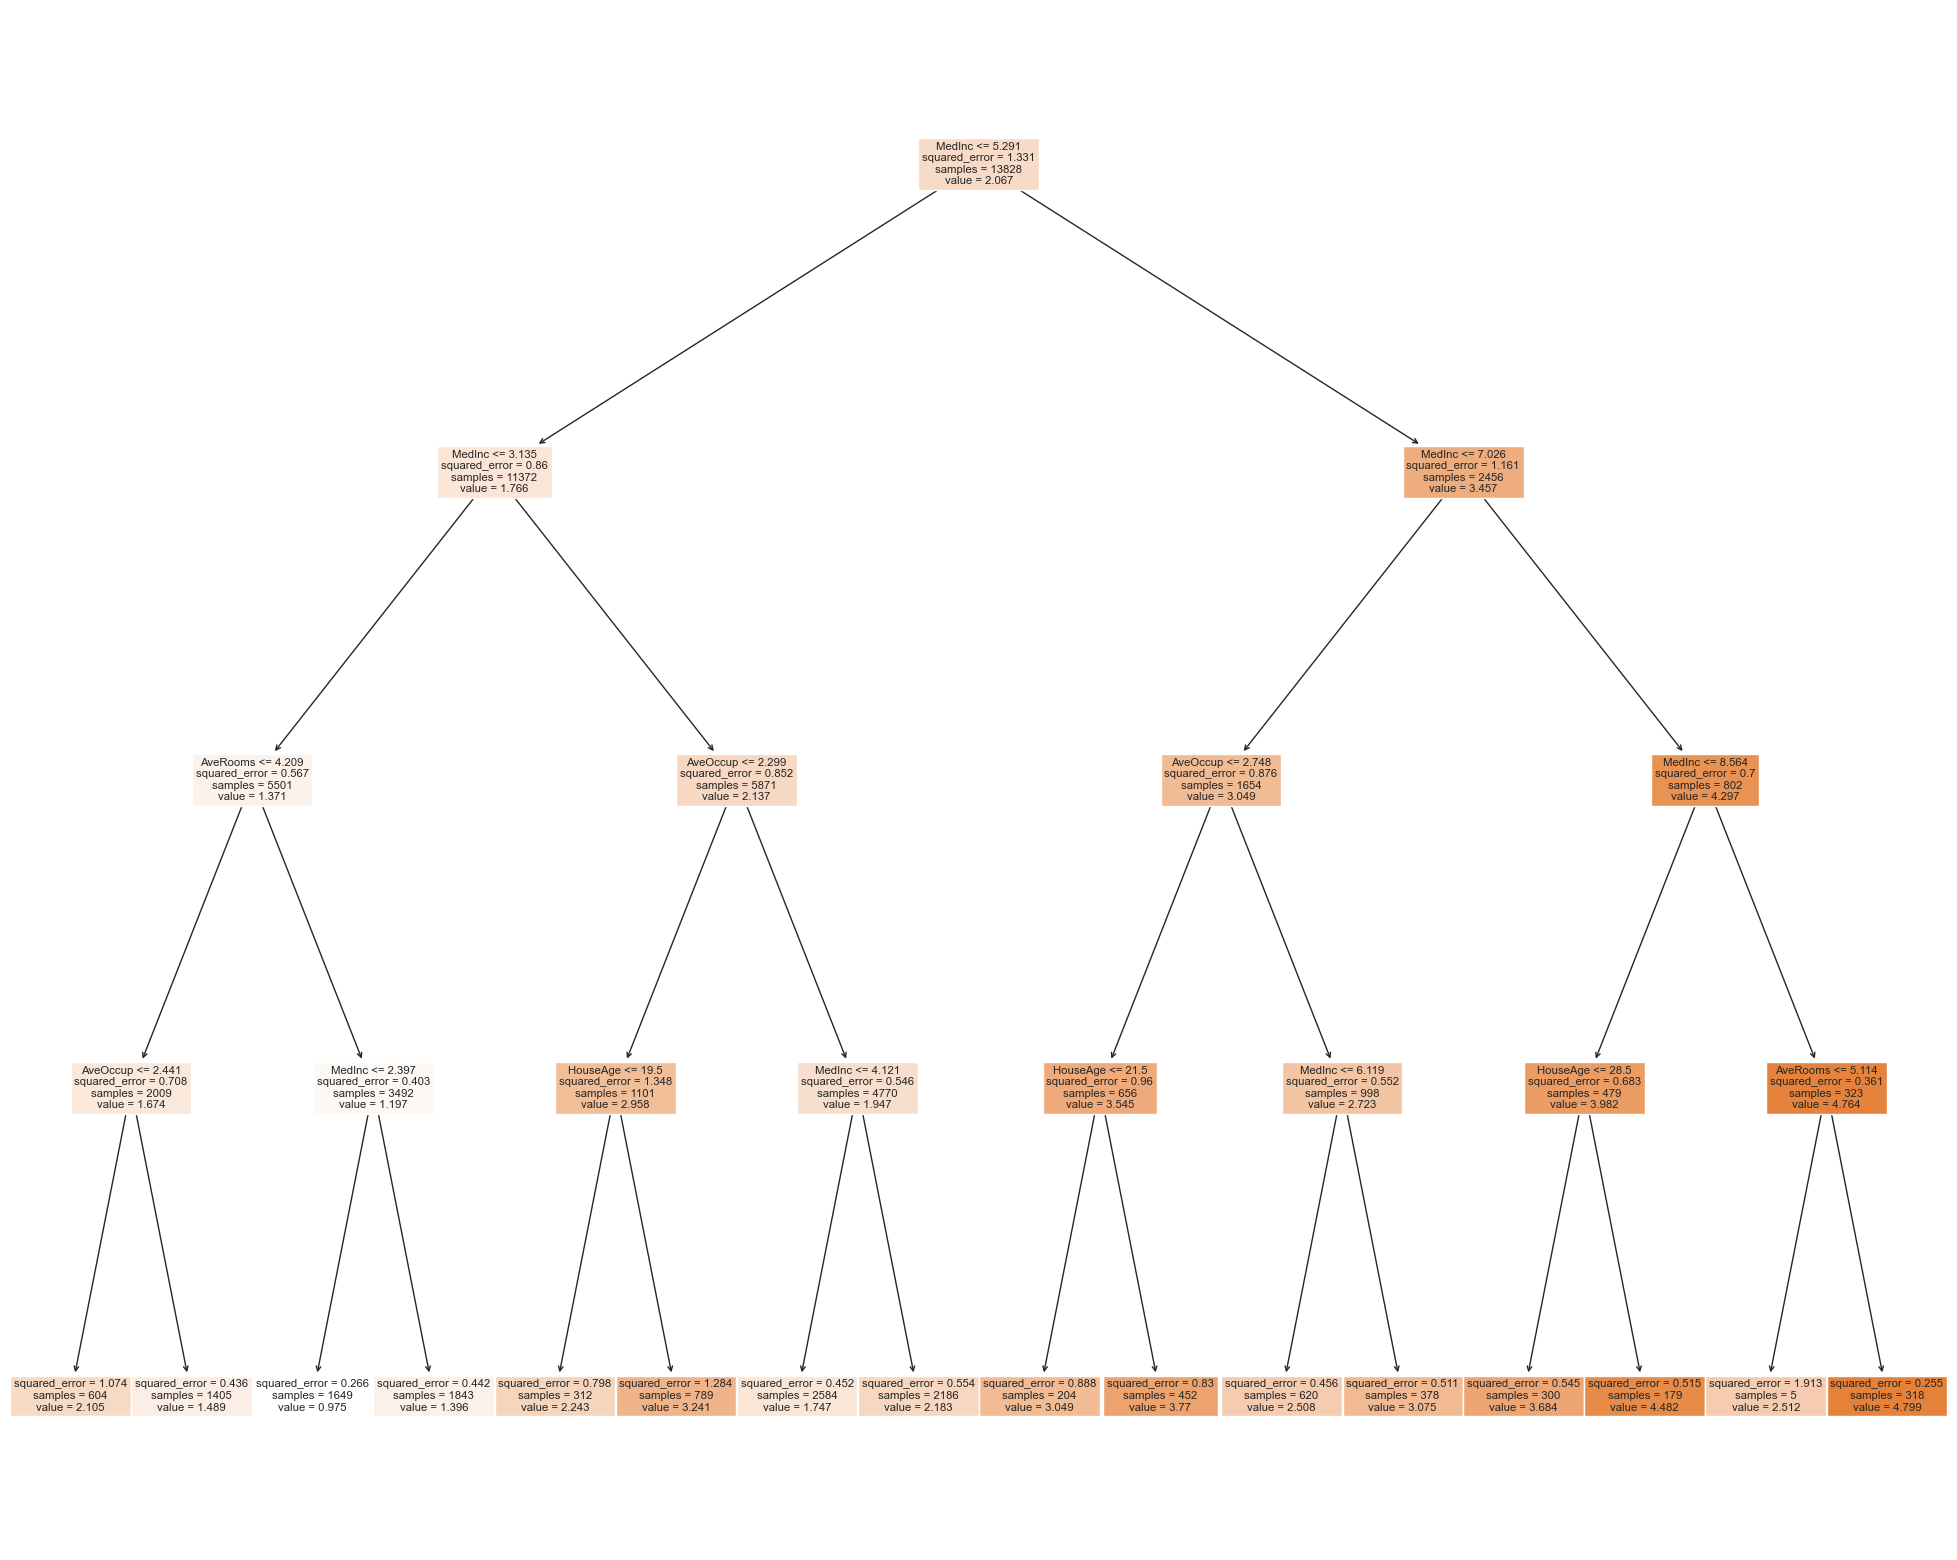

In [ ]:
regr = tree.DecisionTreeRegressor(max_depth=4)
np.random.seed(42) # reproducibility
# We train it
regr.fit(X_train, y_train)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))

_ = tree.plot_tree(regr,
                   feature_names = housing_meta.feature_names,
                   filled=True)

# **Entrenaremos con Model tree (usados para la regresión)**

In [ ]:
# More info about this implementation of model trees
# https://towardsdatascience.com/linear-tree-the-perfect-mix-of-linear-model-and-decision-tree-2eaed21936b7
# https://pypi.org/project/linear-tree/

# IMPORTANT: This implementation of Model Trees is able to deal with Categorical Features (whose values are encoded as integers 0,1,2, ...)
# in order to use categorical features, the parameter categorical_features must be used.

In [ ]:
# !pip install --upgrade linear-tree
# !pip install pydot
# !pip install graphviz

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

regr = LinearTreeRegressor(base_estimator=LinearRegression())
np.random.seed(42) # reproducibility
# We train it
regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
r2_tree = metrics.r2_score(y_test, y_test_pred)
print(f"RMSE of the tree: {rmse_tree}")
print(f"R2 of the tree: {r2_tree}")

# We would have to compute the final model with all available data
# Not done here, only interested on test RMSE

RMSE of the tree: 0.601618300546885
R2 of the tree: 0.7283905128198915


Pintamos el árbol resultante

In [57]:
regr.plot_model(feature_names=housing_meta.feature_names)

NameError: name 'regr' is not defined

Para comprobar los modelos lineales en las hojas, tenemos que ir hoja a hoja. A continuación se muestra los coeficientes del modelo lineal en el nodo 7

In [ ]:
leaves = regr.summary(feature_names=housing_meta.feature_names, only_leaves=True, max_depth=None)

In [ ]:
leaves

{7: {'loss': 0.53832, 'samples': 1741, 'models': LinearRegression()},
 8: {'loss': 0.49163, 'samples': 2010, 'models': LinearRegression()},
 9: {'loss': 0.51824, 'samples': 1591, 'models': LinearRegression()},
 10: {'loss': 0.39367, 'samples': 1936, 'models': LinearRegression()},
 4: {'loss': 0.18285, 'samples': 1941, 'models': LinearRegression()},
 11: {'loss': 0.19074, 'samples': 2214, 'models': LinearRegression()},
 12: {'loss': 0.26167, 'samples': 2395, 'models': LinearRegression()}}

In [ ]:
from pprint import pprint
model_7_coefs = leaves[7]['models'].coef_
model_7_intercept = leaves[7]['models'].intercept_
pprint(list(zip(housing_meta.feature_names, model_7_coefs)))
pprint(f'intercept: {model_7_intercept}')

[('MedInc', 0.3211978),
 ('HouseAge', 0.009533927),
 ('AveRooms', 0.053665258),
 ('AveBedrms', 0.027785428),
 ('Population', 1.2990553e-05),
 ('AveOccup', -0.3423915),
 ('Latitude', -0.28540224),
 ('Longitude', -0.76213783)]
'intercept: -78.72712707519531'


In [58]:
?LinearTreeRegressor

Object `Ridge` not found.


## Ejercicio.
Obtener un modelo de árbolo lineal que sólo utilice la variable `'MedInc'` para estimar `'MEDV''.
Dibujar el árbol resultante y obtener los coeficiente de algún nodo hoja.

In [ ]:
boston1 = housing[['MedInc', 'MEDV']].copy()

y = boston1['MEDV']
X = boston1.drop('MEDV', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Tu código aquí
regr = LinearTreeRegressor(base_estimator=LinearRegression())
np.random.seed(42) # reproducibility
# We train it
regr.fit(X_train, y_train)
# We obtain predictions on the test set
y_test_pred = regr.predict(X_test)
# We compute accuracy
rmse_tree = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print(f"RMSE of the tree: {rmse_tree}")


RMSE of the tree: 0.8344175325768663


In [ ]:
# obtenemos información de los nodos hojas del árbol
# Tu código aquí
leaves = regr.summary(feature_names=['MedInc'], only_leaves=True, max_depth=None)
leaves





{3: {'loss': 0.48578, 'samples': 2305, 'models': LinearRegression()},
 9: {'loss': 0.52078, 'samples': 1728, 'models': LinearRegression()},
 10: {'loss': 0.60673, 'samples': 1729, 'models': LinearRegression()},
 11: {'loss': 0.80195, 'samples': 2882, 'models': LinearRegression()},
 12: {'loss': 0.85327, 'samples': 1728, 'models': LinearRegression()},
 6: {'loss': 0.76842, 'samples': 1727, 'models': LinearRegression()},
 2: {'loss': 0.74164, 'samples': 1729, 'models': LinearRegression()}}

In [ ]:
# Obtenemos los coeficientes para el nodo 12 (u otro cualquiera)
model_12_coefs = leaves[12]['models'].coef_
model_12_intercept = leaves[12]['models'].intercept_
pprint(list(zip(['MedInc'], model_12_coefs)))
pprint(f'intercept: {model_12_intercept}')
